# Import necessaries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error ,mean_absolute_error
import torch
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./ETA.csv')

# Train with provided LinearRegression

In [4]:
#difine X & Y then splite train and test
df['first_param'] = df['distance'].values / df['speed'].values
X = df[['first_param', 'traffic', 'weather_conditions']].to_numpy()
Y = df['Time_Arrival'].to_numpy()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#linear regression model
model = LinearRegression().fit(X_train, Y_train)

#perdict y_pred
y_pred = model.predict(X_test)

#print MSE & MAE
print("Mean Squared Error:", mean_squared_error(Y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(Y_test, y_pred))

Mean Squared Error: 1.4523052524635268e-30
Mean Absolute Error: 9.50350909079134e-16


# LinearRegression without Provided ones

In [5]:
# initialize parameter
w0 = torch.tensor(10.0, requires_grad=True)
w1 = torch.tensor(15.0, requires_grad=True)
w2 = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)
step_size = 0.006  #  for optimiser GD
epochs = 3500

In [6]:
# difine X & Y
df = pd.read_csv('./ETA.csv')
df['first_param'] = df['distance'].values / df['speed'].values
X = df[['first_param', 'traffic', 'weather_conditions']].values
Y = df['Time_Arrival'].values

X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32)

# forward function
def forward(X, w0, w1, w2, b):
    return w0 * X[:, 0] + w1 * X[:, 1] + w2 * X[:, 2] + b

#loss functions
def loss_mse_func(Y_true, Y_pred):
    return torch.mean((Y_true - Y_pred) ** 2)

def loss_mae_func(Y_true, Y_pred):
    return torch.mean(torch.abs(Y_true - Y_pred))

#mse training
loss_mse_list=[]
for epoch in range(epochs):
    Y_pred_mse = forward(X, w0, w1, w2, b)

    loss_mse = loss_mse_func(Y, Y_pred_mse)
    loss_mse_list.append(loss_mse.item())
    loss_mse.backward()

    with torch.no_grad():
        w0 -= step_size * w0.grad
        w1 -= step_size * w1.grad
        w2 -= step_size * w2.grad
        b -= step_size * b.grad

        w0.grad.zero_()
        w1.grad.zero_()
        w2.grad.zero_()
        b.grad.zero_()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Train MSE loss: {loss_mse.item():>7f}")

Epoch 0: Train MSE loss: 17122.109375
Epoch 100: Train MSE loss: 32.691532
Epoch 200: Train MSE loss: 27.285530
Epoch 300: Train MSE loss: 23.298538
Epoch 400: Train MSE loss: 20.165920
Epoch 500: Train MSE loss: 17.594267
Epoch 600: Train MSE loss: 15.423372
Epoch 700: Train MSE loss: 13.559531
Epoch 800: Train MSE loss: 11.943167
Epoch 900: Train MSE loss: 10.533056
Epoch 1000: Train MSE loss: 9.298398
Epoch 1100: Train MSE loss: 8.214854
Epoch 1200: Train MSE loss: 7.262424
Epoch 1300: Train MSE loss: 6.424263
Epoch 1400: Train MSE loss: 5.685977
Epoch 1500: Train MSE loss: 5.035151
Epoch 1600: Train MSE loss: 4.461015
Epoch 1700: Train MSE loss: 3.954199
Epoch 1800: Train MSE loss: 3.506538
Epoch 1900: Train MSE loss: 3.110894
Epoch 2000: Train MSE loss: 2.761026
Epoch 2100: Train MSE loss: 2.451474
Epoch 2200: Train MSE loss: 2.177447
Epoch 2300: Train MSE loss: 1.934750
Epoch 2400: Train MSE loss: 1.719696
Epoch 2500: Train MSE loss: 1.529049
Epoch 2600: Train MSE loss: 1.359967


In [7]:
# initialize parameter
w0 = torch.tensor(10.0, requires_grad=True)
w1 = torch.tensor(15.0, requires_grad=True)
w2 = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)

In [9]:
#mae training
loss_mae_list=[]
for epoch in range(epochs):
    Y_pred_mae = forward(X, w0, w1, w2, b)

    loss_mae = loss_mae_func(Y, Y_pred_mae)
    loss_mae_list.append(loss_mae.item())
    loss_mae.backward()

    with torch.no_grad():
        w0 -= step_size * w0.grad
        w1 -= step_size * w1.grad
        w2 -= step_size * w2.grad
        b -= step_size * b.grad

        w0.grad.zero_()
        w1.grad.zero_()
        w2.grad.zero_()
        b.grad.zero_()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Train MAE loss: {loss_mae.item():>7f}")


Epoch 0: Train MAE loss: 118.875801
Epoch 100: Train MAE loss: 48.185062
Epoch 200: Train MAE loss: 5.120848
Epoch 300: Train MAE loss: 5.082099
Epoch 400: Train MAE loss: 5.043957
Epoch 500: Train MAE loss: 5.006208
Epoch 600: Train MAE loss: 4.968941
Epoch 700: Train MAE loss: 4.932323
Epoch 800: Train MAE loss: 4.896176
Epoch 900: Train MAE loss: 4.860726
Epoch 1000: Train MAE loss: 4.825754
Epoch 1100: Train MAE loss: 4.791237
Epoch 1200: Train MAE loss: 4.757445
Epoch 1300: Train MAE loss: 4.724227
Epoch 1400: Train MAE loss: 4.691333
Epoch 1500: Train MAE loss: 4.659058
Epoch 1600: Train MAE loss: 4.627229
Epoch 1700: Train MAE loss: 4.595926
Epoch 1800: Train MAE loss: 4.565302
Epoch 1900: Train MAE loss: 4.534844
Epoch 2000: Train MAE loss: 4.504758
Epoch 2100: Train MAE loss: 4.475036
Epoch 2200: Train MAE loss: 4.445642
Epoch 2300: Train MAE loss: 4.416486
Epoch 2400: Train MAE loss: 4.387724
Epoch 2500: Train MAE loss: 4.359273
Epoch 2600: Train MAE loss: 4.331303
Epoch 2700

MSE Loss  0.4799310863018036
MAE Loss  4.0899434089660645


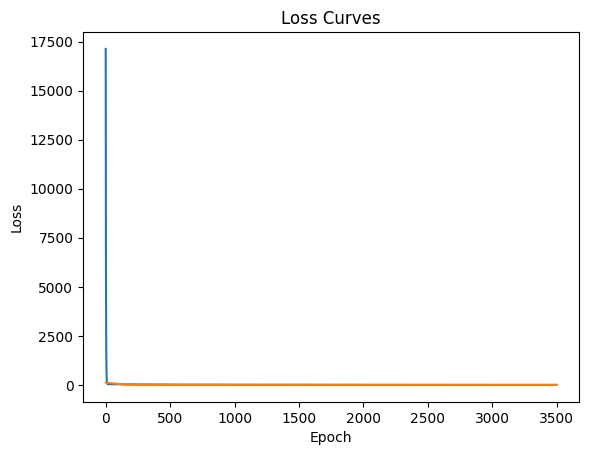

In [11]:
# MSE & MAE Loss
print("MSE Loss ",loss_mse.item())
print("MAE Loss ", loss_mae.item())


# Plot the loss history for both models
plt.plot(loss_mse_list, label='MSE Loss')
plt.plot(loss_mae_list, label='MAE Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.savefig('LossCurve.png')
plt.show()